# Task 1 : SALES DATA ANALYSIS

In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


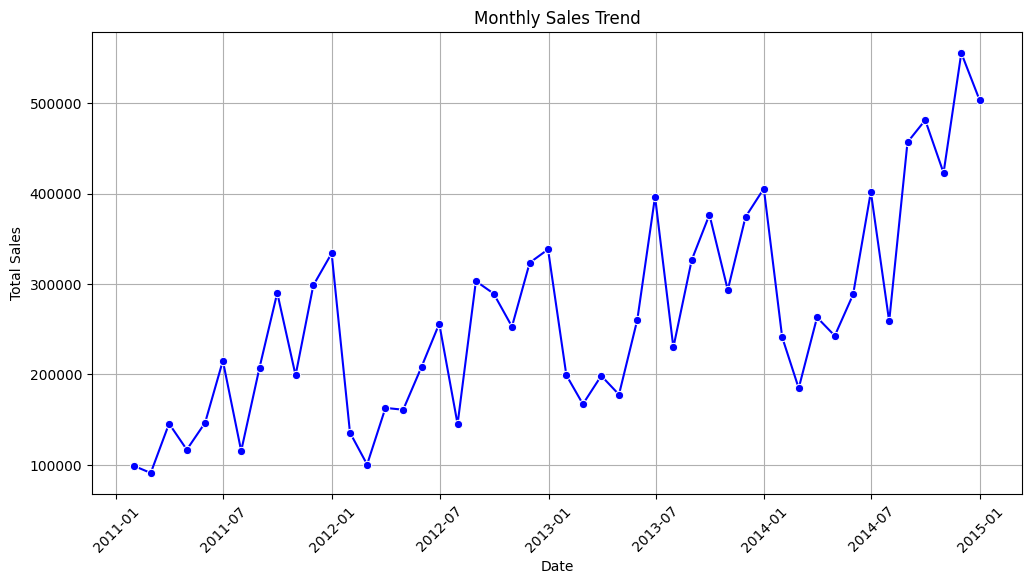

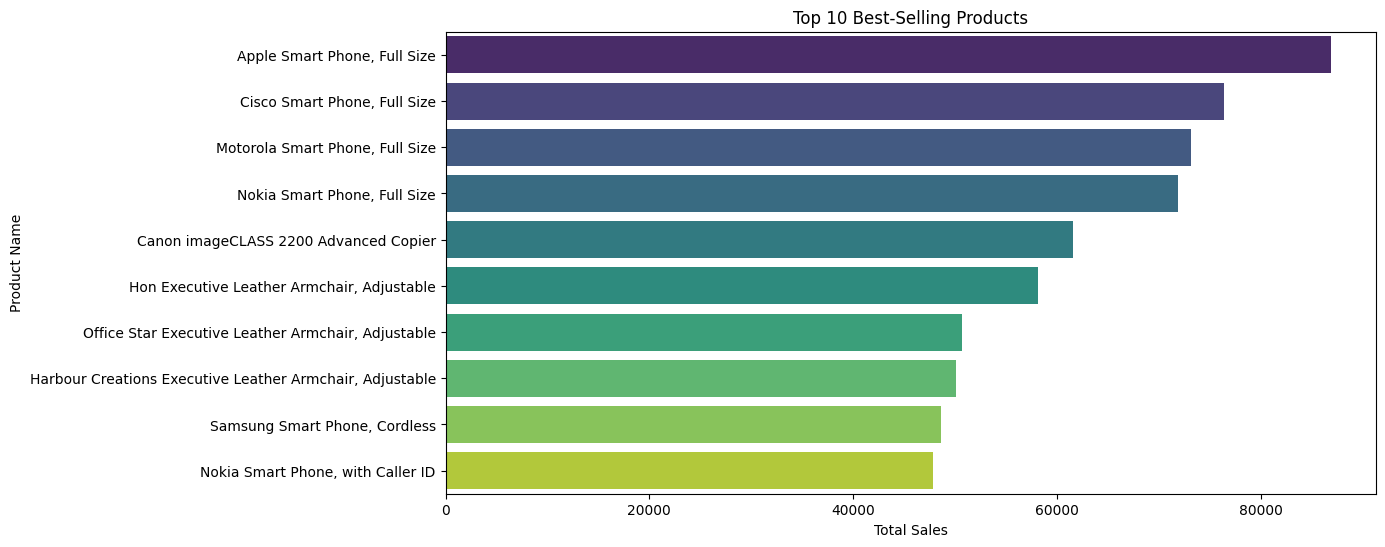

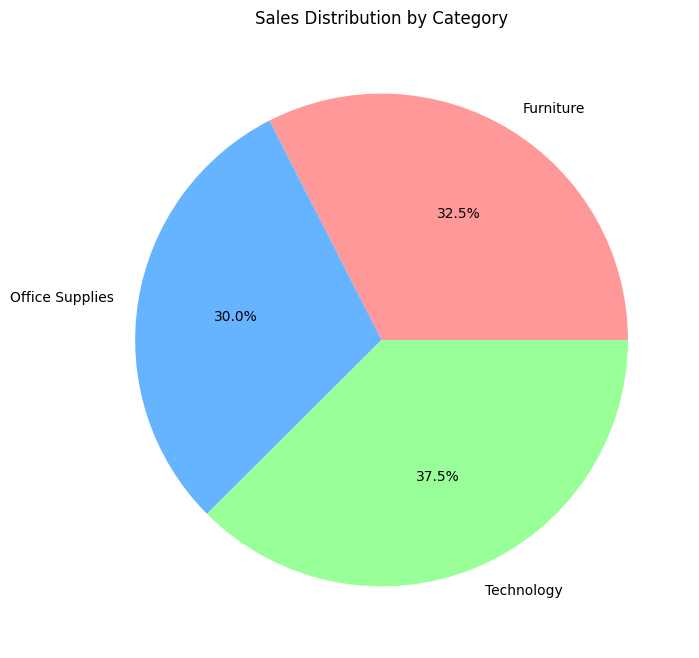

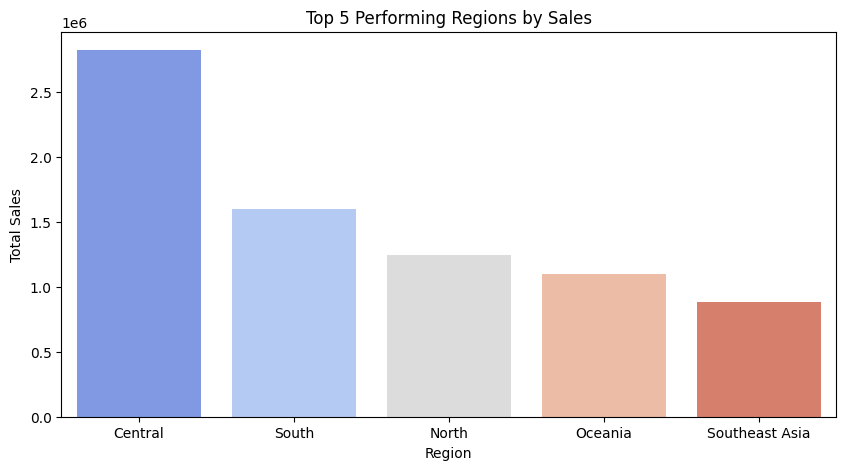

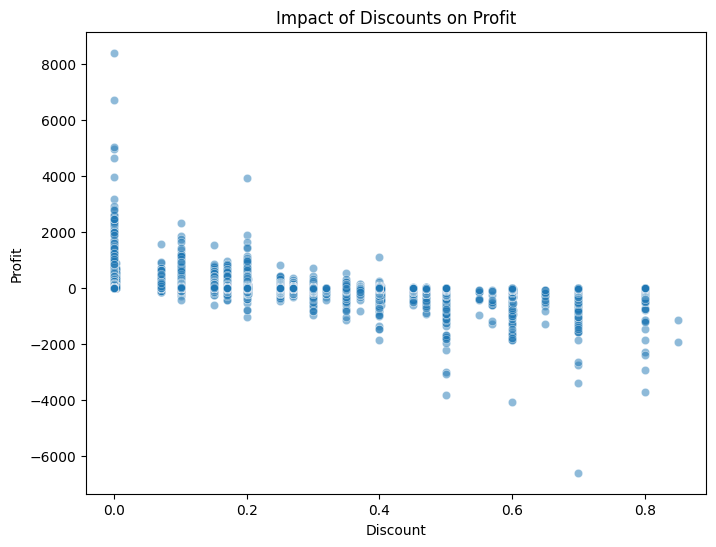

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Data
xls = pd.ExcelFile("ECOMM DATA.xlsx")
orders_df = pd.read_excel(xls, sheet_name="Orders")
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])

# 1. Sales Trend Over Time (Line Chart)
monthly_sales = orders_df.resample("ME", on="Order Date")["Sales"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 2. Best-Selling Products (Bar Chart)
top_products = orders_df.groupby("Product Name")["Sales"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", legend=False)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()


# 3. Sales by Category (Pie Chart)
category_sales = orders_df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Sales Distribution by Category")
plt.show()

# 4. Top 5 Regions by Sales (Bar Chart)
top_regions = orders_df.groupby("Region")["Sales"].sum().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_regions.index, y=top_regions.values, hue=top_regions.index, palette="coolwarm", legend=False)
plt.title("Top 5 Performing Regions by Sales")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()
# 5. Impact of Discounts on Profit (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=orders_df["Discount"], y=orders_df["Profit"], alpha=0.5)
plt.title("Impact of Discounts on Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()
